In [1]:
import sys
from pathlib import Path
if "../src" not in sys.path:
    sys.path.append("../src")

import matplotlib.pyplot as plt
import dietcoke

corpus = dietcoke.Corpus('tier1')
corpus.read_corpus()

In [2]:
texts = dietcoke.Text(corpus.corpus[0])
texts.clean()
growth_obj = dietcoke.Growth(''.join(texts.clean_texts), 1000)

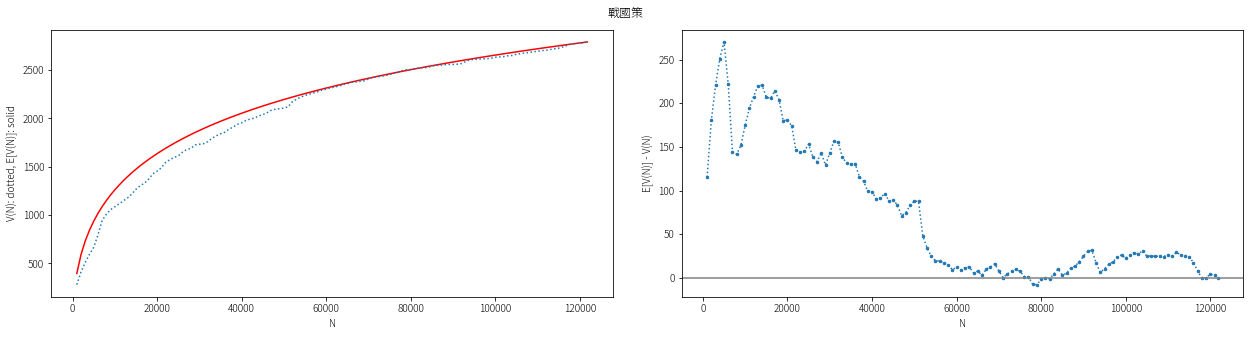

In [3]:
growth_obj.get_vgc()
growth_obj.plot_vgc(growth_obj.vgc_df, figsize=(18, 5))
plt.suptitle(texts.obj['title'])
plt.show()

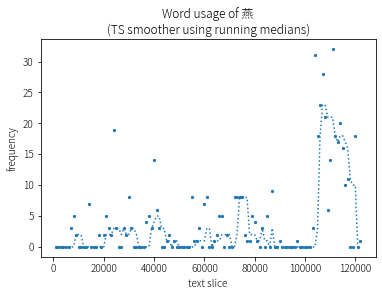

In [4]:
growth_obj.plot_char_freq_by_text_slice('燕')

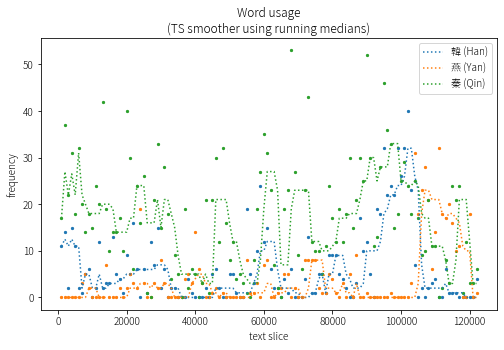

In [5]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
growth_obj.plot_char_freq_by_text_slice('韓')
growth_obj.plot_char_freq_by_text_slice('燕')
growth_obj.plot_char_freq_by_text_slice('秦')
plt.legend(['韓 (Han)', '燕 (Yan)', '秦 (Qin)'])
plt.title('Word usage\n(TS smoother using running medians)')
plt.show()

/Users/mac/Documents/GitHub/GIL/CCKF/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


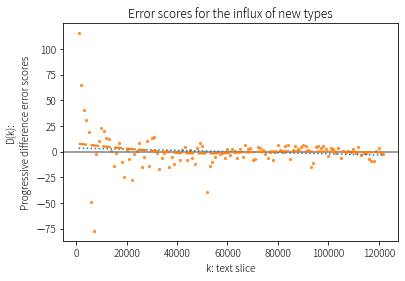

In [6]:
growth_obj.get_prog_err_scores_df()
growth_obj.plot_prog_err_scores(growth_obj.prog_err_scores_df)
plt.show()

In [7]:
growth_obj.get_underdisperse_df()
growth_obj.underdisperse_chars

array(['東', '秦', '而', '求', '君', '患', '之', '以', '曰', '大', '王', '臣', '請',
       '於', '齊', '至', '謂', '夫', '為', '無', '也', '欲', '兵', '自', '計', '與',
       '不', '若', '國', '名', '得', '五', '萬', '人', '使', '將', '又', '子', '相',
       '何', '從', '寡', '可', '下', '上', '其', '日', '矣', '入', '必', '出', '楚',
       '對', '中', '固', '者', '非', '然', '伐', '一', '十', '所', '此', '今', '有',
       '敢', '乃', '攻', '陽', '趙', '如', '公', '二', '功', '則', '聽', '故', '且',
       '戰', '死', '恐', '乘', '事', '亦', '韓', '重', '天', '明', '令', '地', '是',
       '取', '乎', '見', '過', '皆', '復', '善', '魏', '主', '行', '信', '強', '合',
       '後', '因', '說', '百', '三', '成', '知', '先', '已', '反', '外', '用', '能',
       '交', '侯', '未', '亡', '言', '吾', '足', '聞', '雖', '利'], dtype=object)

In [8]:
for warring_state in '韓 趙 魏 楚 燕 齊 秦'.split(' '):
    print(f'Is {warring_state} underdispersed:', warring_state in growth_obj.underdisperse_chars)

Is 韓 underdispersed: True
Is 趙 underdispersed: True
Is 魏 underdispersed: True
Is 楚 underdispersed: True
Is 燕 underdispersed: False
Is 齊 underdispersed: True
Is 秦 underdispersed: True


100%|██████████| 127/127 [00:00<00:00, 140.87it/s]


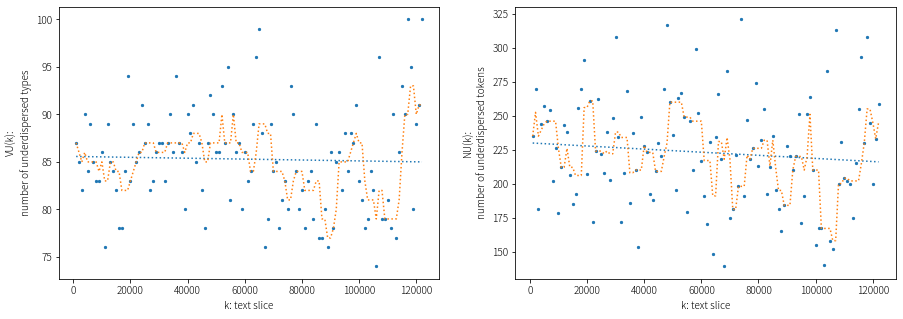

In [9]:
growth_obj.get_d_f_threshold()
growth_obj.get_U_df()

fig = plt.figure(figsize=(15, 5))
plt.figure(1)

plt.subplot(121)
growth_obj.plot_VU(growth_obj.U_df)

plt.subplot(122)
growth_obj.plot_NU(growth_obj.U_df)

plt.show()

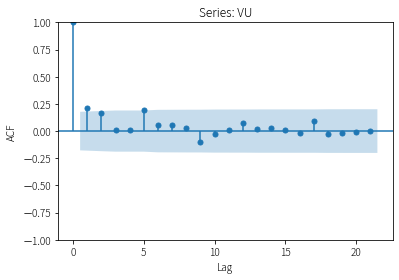

In [10]:
growth_obj.plot_VU_acf(growth_obj.U_df)

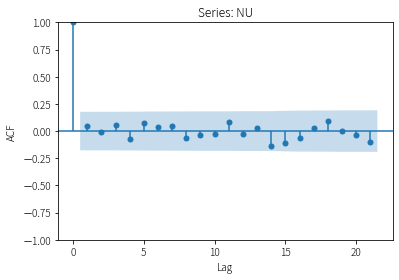

In [11]:
growth_obj.plot_NU_acf(growth_obj.U_df)

100%|██████████| 2791/2791 [00:21<00:00, 130.04it/s]


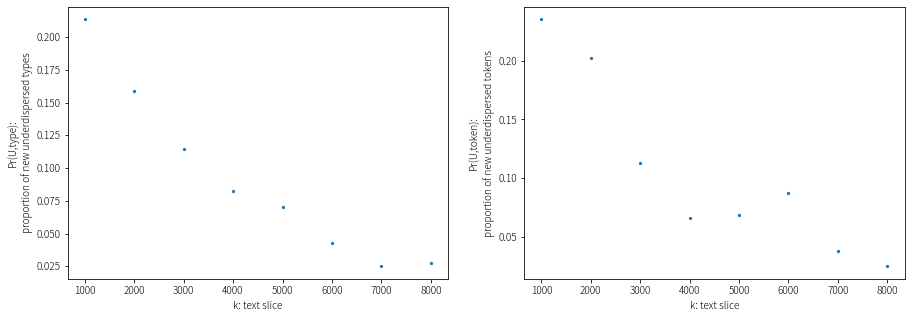

In [12]:
growth_obj.get_Pr_df()

fig = plt.figure(figsize=(15, 5))
plt.figure(1)

plt.subplot(121)
growth_obj.plot_Pr_type(growth_obj.Pr_abridf)

plt.subplot(122)
growth_obj.plot_Pr_token(growth_obj.Pr_abridf)

plt.show()

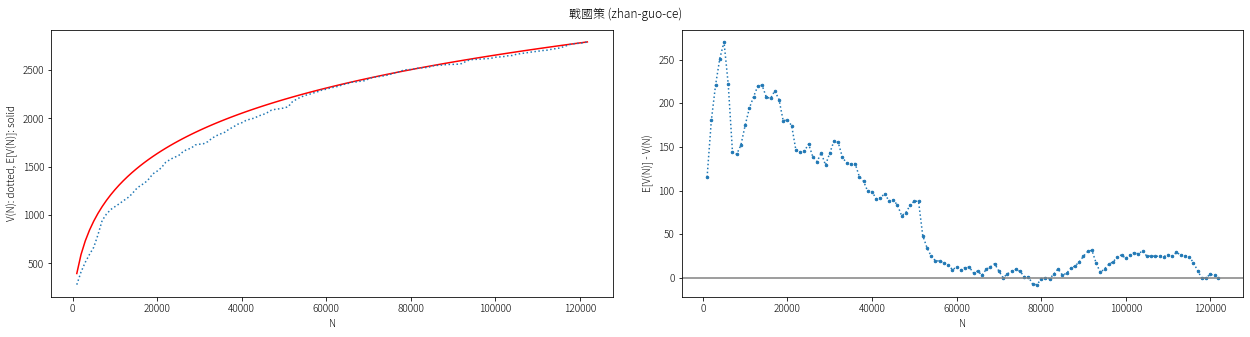

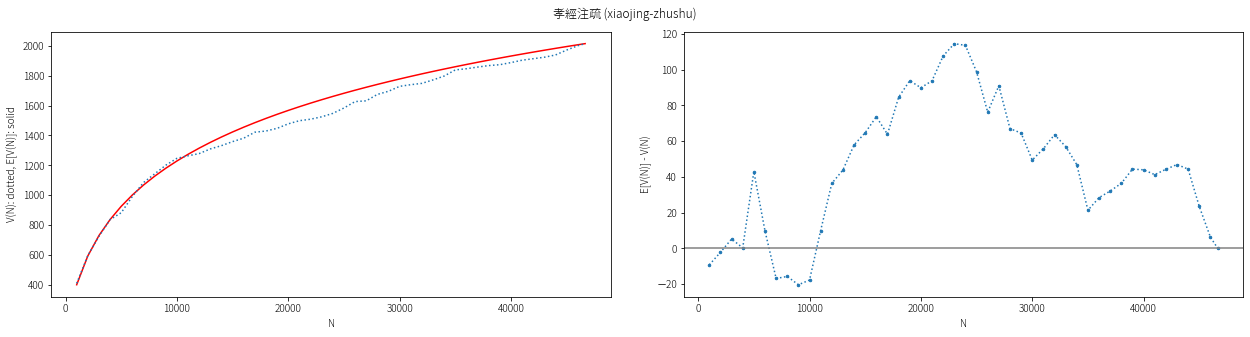

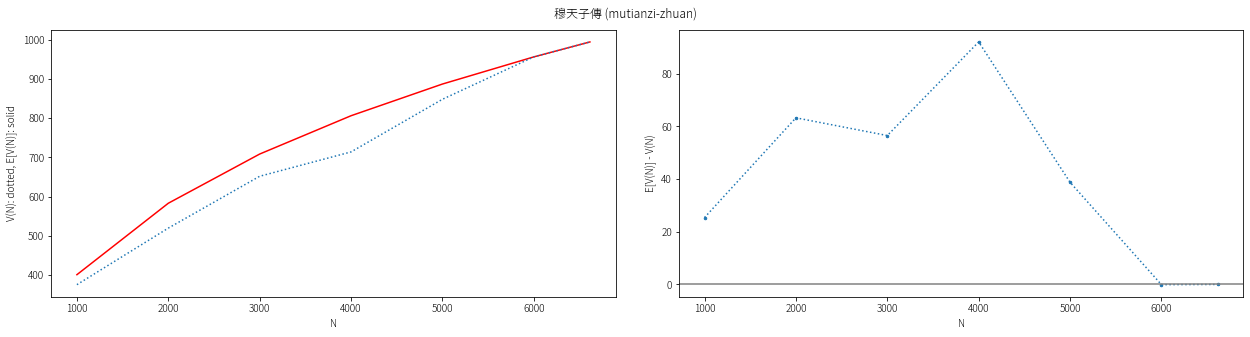

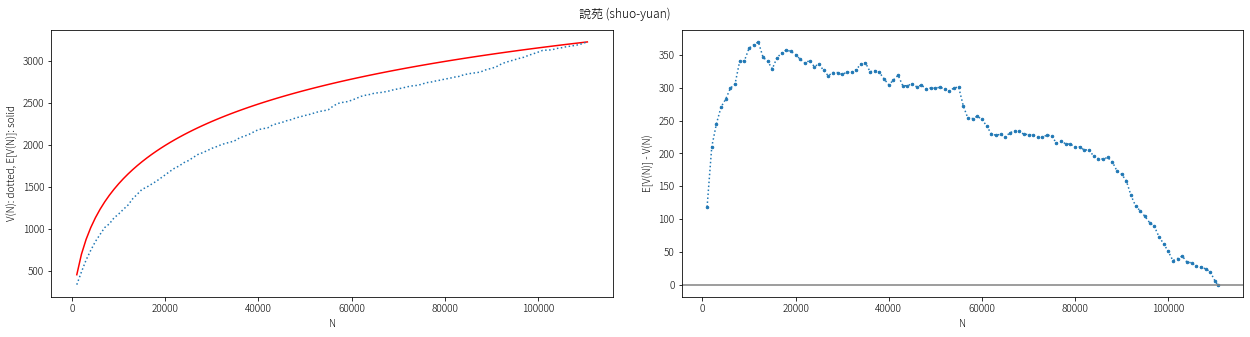

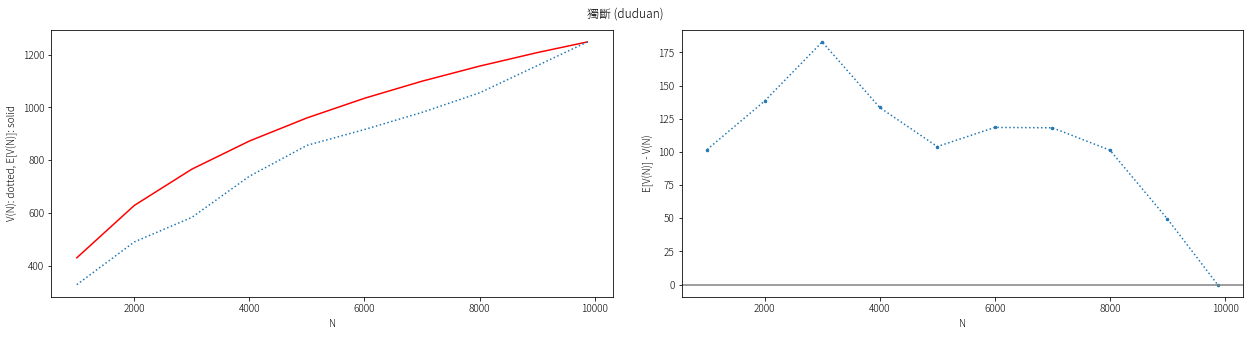

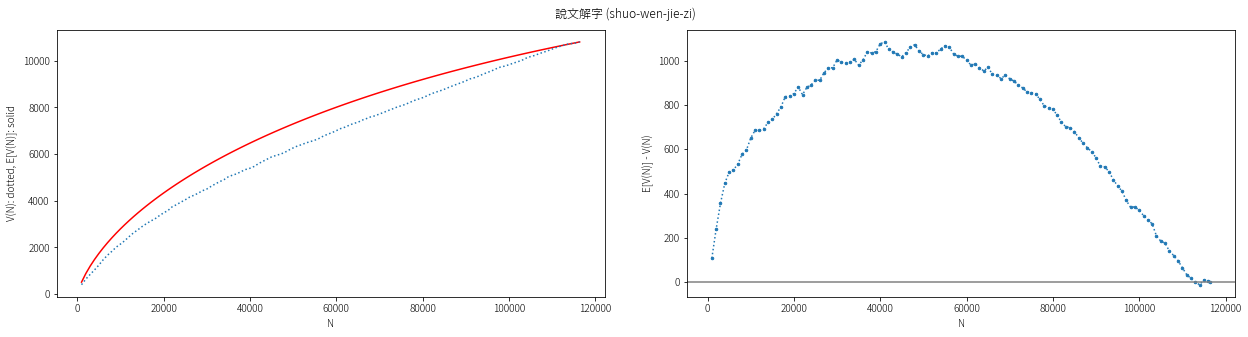

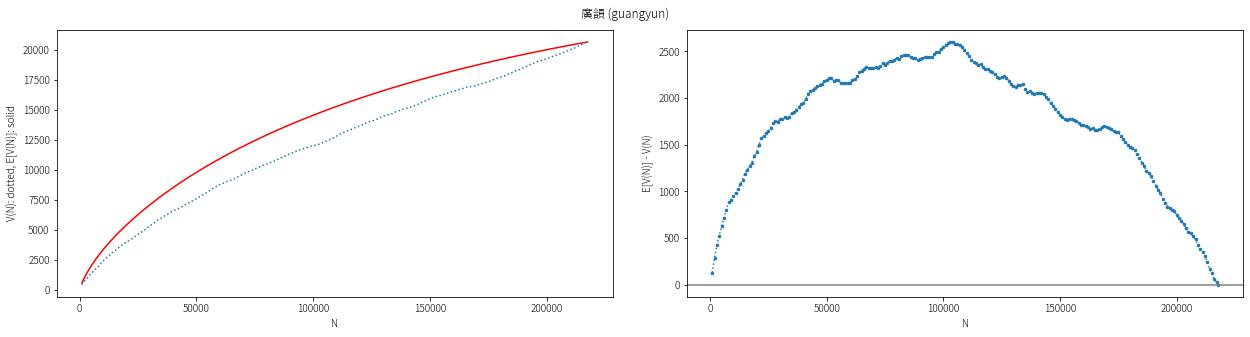

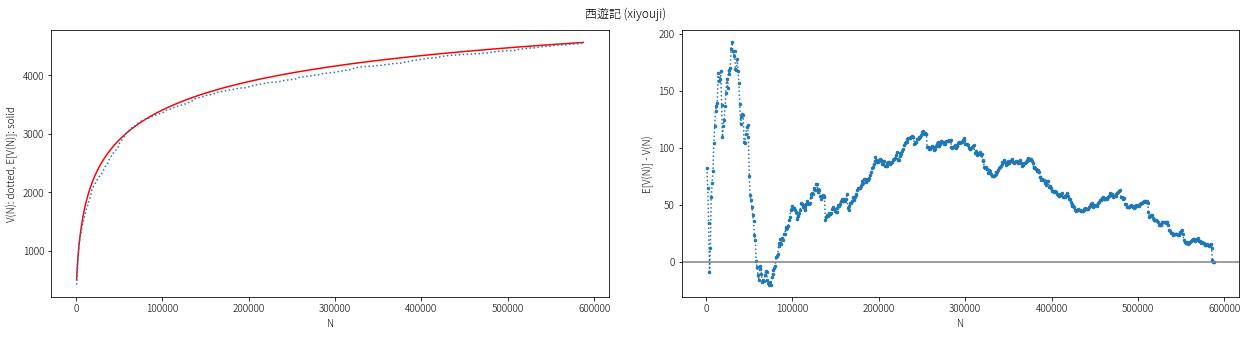

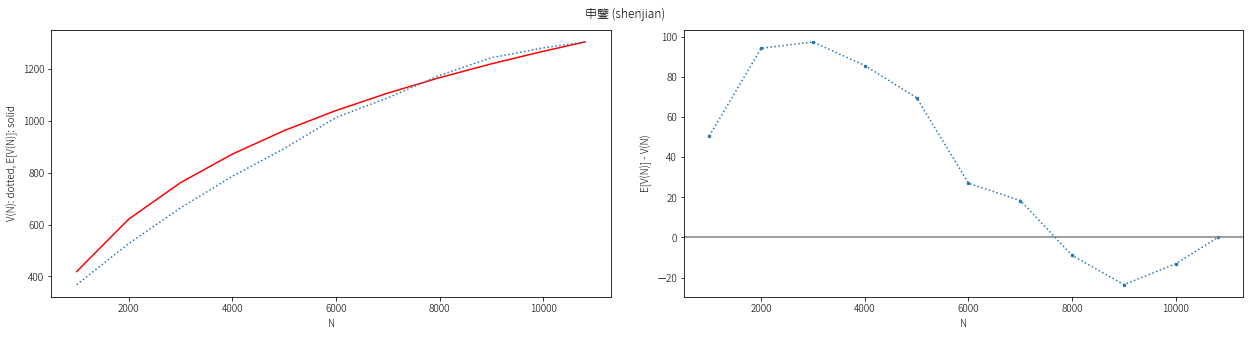

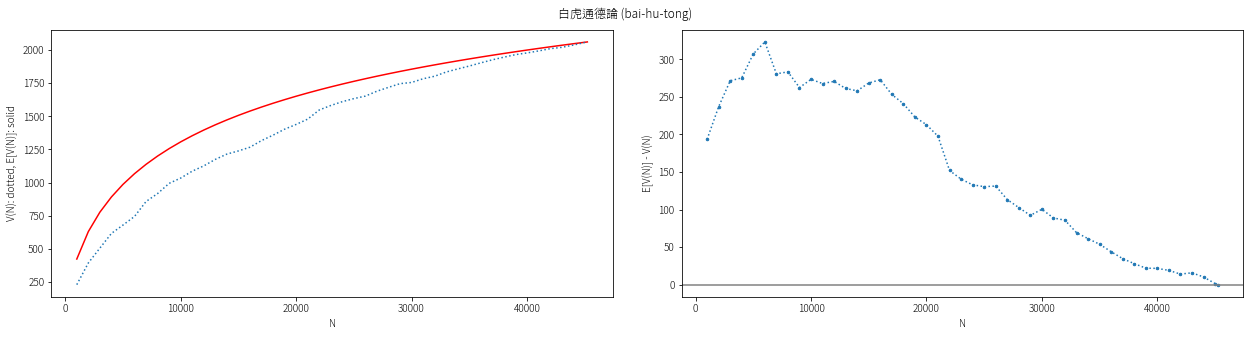

In [15]:
for i in range(10):
    texts = dietcoke.Text(corpus.corpus[i])
    texts.clean()

    growth_obj = dietcoke.Growth(''.join(texts.clean_texts), 1000)
    growth_obj.get_vgc()
    growth_obj.plot_vgc(growth_obj.vgc_df, figsize=(18, 5))
    plt.suptitle(texts.obj['title'] + ' (' + texts.obj['urn'] + ')')
    plt.show()

In [14]:
# D_k, DU_k, D_k - DU_k
# freq_k